In [1]:
#%pip install pandas numpy seaborn statsmodels dowhy graphviz tqdm

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
def simulate(**kwargs):
  values = {}
  for k,v in kwargs.items():
    inputs = {arg: values[arg] for arg in v.__code__.co_varnames}
    values[k] = v(**inputs)
  return pd.DataFrame(values)

In [4]:
df = simulate(
    age = lambda: np.random.uniform(5, 45, 1000),
    exercise = lambda age: age + np.random.normal(0, 10, 1000),
    blood_pressure = lambda age, exercise: 5*age - exercise,
    decade = lambda age: np.round(age, -1)
)

<AxesSubplot: xlabel='exercise', ylabel='blood_pressure'>

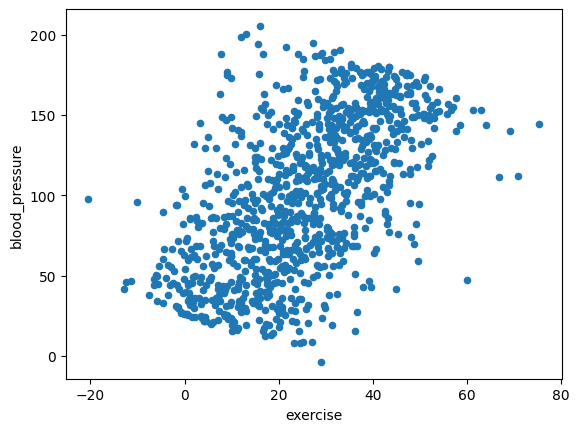

In [5]:
df.plot.scatter("exercise", "blood_pressure")

<AxesSubplot: xlabel='exercise', ylabel='blood_pressure'>

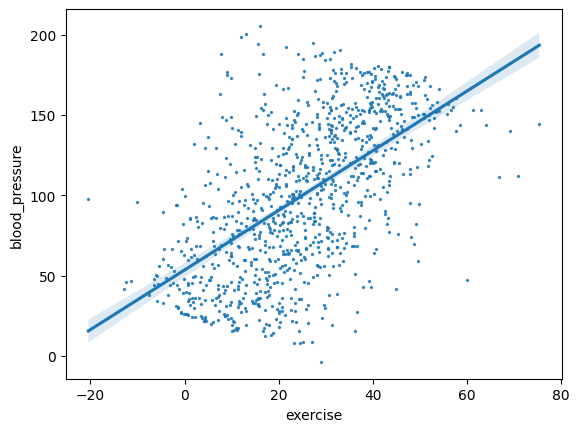

In [6]:
sns.regplot(data=df, x="exercise", y="blood_pressure", scatter_kws={'s':2})

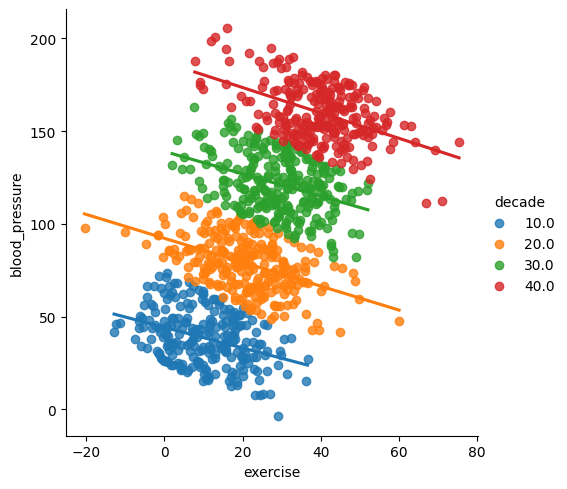

In [7]:
sns.lmplot(data=df, x='exercise', y='blood_pressure', hue='decade', ci=None)

In [8]:
result = smf.ols('blood_pressure ~ exercise', data=df).fit()
print(result.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.4590      2.395     22.324      0.000      48.760      58.158
exercise       1.8567      0.082     22.562      0.000       1.695       2.018


In [9]:
result = smf.ols('blood_pressure ~ exercise + age', data=df).fit()
print(result.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.753e-14   6.01e-15     -4.579      0.000   -3.93e-14   -1.57e-14
exercise      -1.0000   2.51e-16  -3.99e+15      0.000      -1.000      -1.000
age            5.0000   3.25e-16   1.54e+16      0.000       5.000       5.000


In [10]:
result = smf.ols('blood_pressure ~ exercise*C(decade)', data=df).fit()
print(result.summary().tables[1])

                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     44.1719      1.282     34.448      0.000      41.656      46.688
C(decade)[T.20.0]             48.0203      2.241     21.425      0.000      43.622      52.419
C(decade)[T.30.0]             94.8710      2.901     32.706      0.000      89.179     100.563
C(decade)[T.40.0]            143.0179      3.538     40.418      0.000     136.074     149.962
exercise                      -0.5560      0.091     -6.107      0.000      -0.735      -0.377
exercise:C(decade)[T.20.0]    -0.0889      0.120     -0.741      0.459      -0.324       0.146
exercise:C(decade)[T.30.0]    -0.0483      0.124     -0.389      0.697      -0.292       0.195
exercise:C(decade)[T.40.0]    -0.1284      0.121     -1.058      0.291      -0.367       0.110
